# Factors influencing Bike Sharing in San Franscisco Bay Area
## by Janat Birungi

## Investigation Overview
In this analysis, I wanted to findout what factors affected ride sharing in the San Franscisco bay area. My main focus was on the time the trip started, day of the week, gender and duration of the ride. 

## Dataset Overview
The dataset consisted of 183413 individual rides taken. The variables included start_time, end_time, member_gender, duration_sec and other variables which were 16 in total. I transformed the start_time variable to extract start_hour of the ride and the day of the week. I also converted duration_sec into minutes to ease my analysis. 


In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from datetime import datetime
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
# load in the dataset into a pandas dataframe
def read_csv_file(filename):
    """function to read csv files and print rows"""
    data = pd.read_csv(filename)
    data 
    
    return data
rides = read_csv_file('201902-fordgobike-tripdata.csv')
rides

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [26]:
# replace missing values to prep data for analysis
cols_num = ['member_birth_year','start_station_id','end_station_id']
col_cat = ['member_gender', 'start_station_name', 'end_station_name']

rides[cols_num] = rides[cols_num].fillna(0)
rides[col_cat] = rides[col_cat].replace({'NaN':'None'})

# add extra column- duration in minutes(duration_min) and age of the rider(member_age_at_ride_date)
rides['duration_min'] = np.around(rides['duration_sec']/60)
rides['member_age_at_ride_date'] = 2019 - rides['member_birth_year'] 

# create a column for start time (separate time from the date and extract the hour from the timestamp)

rides['start_hour'] = rides['start_time'].apply(lambda x:x.split()[1])
rides['start_hour'] = rides['start_hour'].apply(lambda x:x.split(':')[0])

# convert column data types 
rides['member_birth_year'] = rides['member_birth_year'].astype('int')
rides['member_gender'] = rides['member_gender'].astype('category')
rides['user_type'] = rides['user_type'].astype('category')
rides['bike_share_for_all_trip'] = rides['bike_share_for_all_trip'].astype('category')
rides['start_station_id'] = rides['start_station_id'].astype('category')
rides['end_station_id'] = rides['end_station_id'].astype('category')
rides['duration_min'] = rides['duration_min'].astype('int')
rides['start_hour'] = rides['start_hour'].astype('int')

# split the date from the start time and convert it into day of the week, make it categorical and ordered
rides['day_of_week'] = rides['start_time'].apply(lambda x:x.split()[0])
rides['day_of_week'] = pd.to_datetime(rides['day_of_week'])
rides['day_of_week'] = rides['day_of_week'].dt.day_name()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order = pd.api.types.CategoricalDtype(ordered= True, categories= days)
rides['day_of_week'] = rides['day_of_week'].astype(day_order)

## Distribution of start hour

Start hour has a bimodal distribution with the first peak between 7am and 9am and the second peak between 4pm(16) and 6pm(18). After the first peak, there is a sharp deep after 9pm showing a decrease in frequency of rides

''

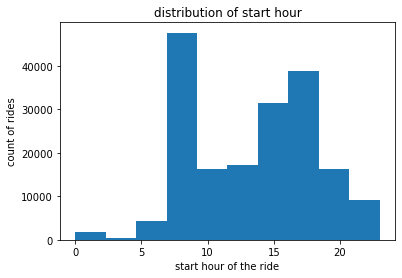

In [27]:
# distribution of start hour
base_color = sb.color_palette()[0]
plt.hist(data= rides, x ='start_hour')
plt.xlabel('start hour of the ride')
plt.ylabel('count of rides')
plt.title('distribution of start hour')
;

## Effect of day of the week on the distribution of rides

Thursdays had the most rides taken in February 2019, with Tuesday coming in second. The days with the least rides was Saturday and Sunday which might mean that people take less rides on the weekends

''

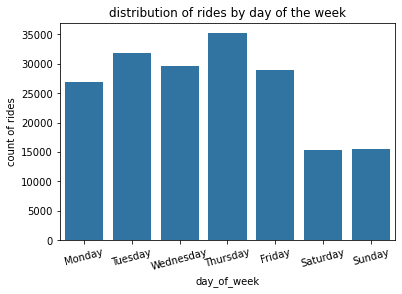

In [28]:
# distribution by days of the week
sb.countplot(data= rides, x= 'day_of_week', color= base_color)
plt.xticks(rotation = 15)
plt.ylabel('count of rides')
plt.title('distribution of rides by day of the week')
;

## Relationship between age and gender
Male riders are slightly older than their female counterparts with male having a median age of about 35 years, females a median of about 32 years and the other group having a median of 37 years. The lower bounds for male and female are the same. Riders are in their late twenties across genders to slightly above 40 years. Indicating a working class population using the poduct.

''

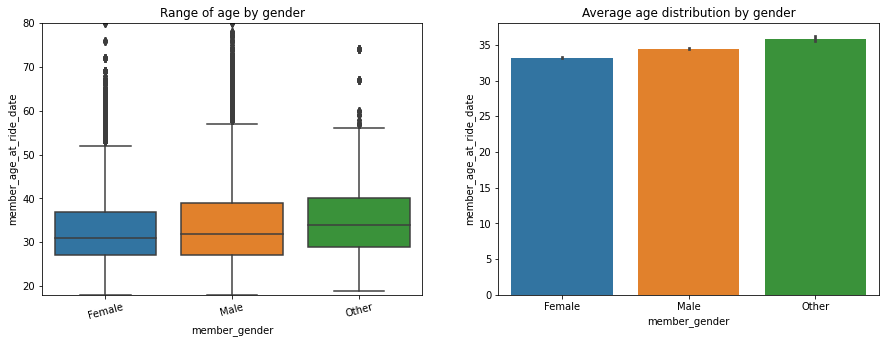

In [29]:
# remove customers that didn't provide a birth date before plotting
age_df = rides[rides['member_age_at_ride_date'] < 2019]

# only consider data for customers that shared a date of birth
plt.figure(figsize= [15, 5])

# boxplot for age distribution
plt.subplot(1,2,1)
sb.boxplot(data= age_df, x = 'member_gender', y = 'member_age_at_ride_date')
plt.xticks(rotation = 15)
plt.ylim(18, 80)
plt.title('Range of age by gender')
;

# barplot 
plt.subplot(1,2,2)
sb.barplot(data= age_df, x = 'member_gender', y = 'member_age_at_ride_date')
plt.title('Average age distribution by gender')
;

## Relationship between day of the week and start hour of trip
The violin plot clearly shows the two peak times in trip start between 7am and 9pm and 4pm and 6pm. Looking at the violin plot, it looks like Monday, Tuesday, Wednesday, Thursday and Friday have the same start hours with both peaks clear throughout those days. The box plot shows clear patterns between days for example days like Mondays and Tuesdays median start hour is 2pm, Wednesdays and Thursdays median start time is about 4pm,Sunday and Saturday around 3pm with Friday having it's own unique start time at around 12pm.


''

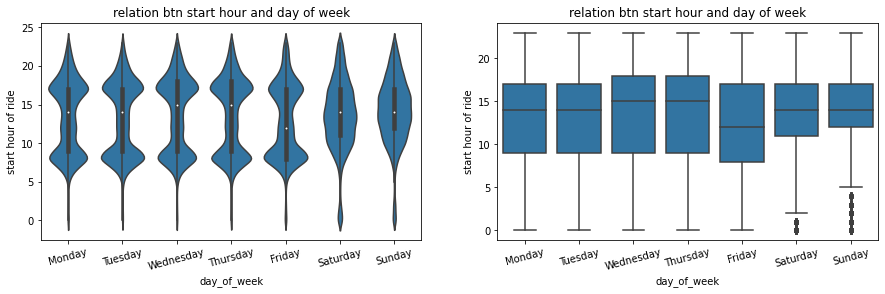

In [30]:
# plot relationship between start hour and day of week
plt.figure(figsize= [15,4])

# first plot a violin plot
plt.subplot(1,2,1)
sb.violinplot(data= rides, x = 'day_of_week', y= 'start_hour', color= base_color)
plt.xticks(rotation = 15)
plt.ylabel('start hour of ride')
plt.title('relation btn start hour and day of week')
;
# second, plot a box plot to get clear picture
plt.subplot(1,2,2)
sb.boxplot(data= rides, x = 'day_of_week', y= 'start_hour', color= base_color)
plt.xticks(rotation = 15)
plt.ylabel('start hour of ride')
plt.title('relation btn start hour and day of week')
;

## Relationship between day of week, duration and day of week
Longer trips are taken by the 'other' gender mainly on Sundays, Saturday and Thursday. Males tend to take longer trips on Friday and Females tend to take longer trips on Sunday. Let's look at start hour to understand this further

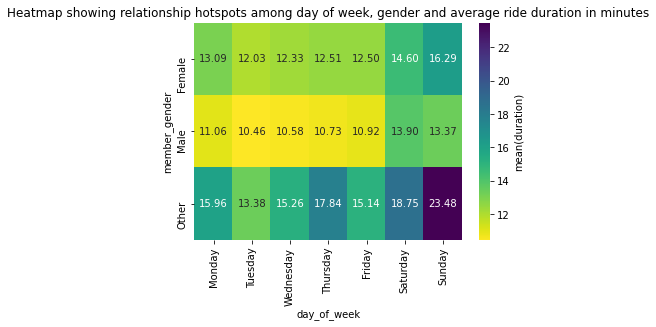

In [31]:
# heatmap of relationship between day of week, gender and duration in minutes
hour_mean = rides.groupby(['day_of_week', 'member_gender']).mean()['duration_min']
hour_mean = hour_mean.reset_index(name = 'duration_avg')
hour_mean = hour_mean.pivot(index = 'member_gender', columns='day_of_week',
                           values= 'duration_avg')
sb.heatmap(hour_mean, annot= True, fmt = '.2f', cmap='viridis_r', cbar_kws= {'label': 'mean(duration)'})
plt.title('Heatmap showing relationship hotspots among day of week, gender and average ride duration in minutes');

## Relationship between day of week, gender and start hour

Generally, all sexes take long trips on Sunday. The 'other' sex takes long trips on Wednesday too. Friday trips are the shortest across the board for all sexes.

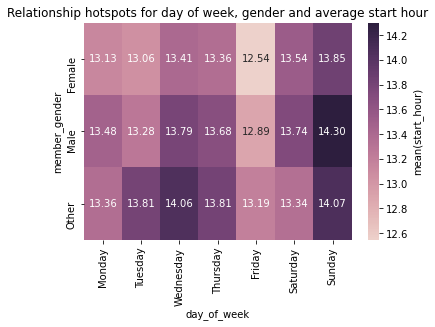

In [32]:
#heatmap of relationship between day of week, gender and start hour 
hour_mean = rides.groupby(['day_of_week', 'member_gender']).mean()['start_hour']
hour_mean = hour_mean.reset_index(name = 'start_hour_avg')
hour_mean = hour_mean.pivot(index = 'member_gender', columns='day_of_week',
                           values= 'start_hour_avg')
sb.heatmap(hour_mean, annot= True, fmt = '.2f', cmap=sb.cubehelix_palette(as_cmap=True), cbar_kws= {'label': 'mean(start_hour)'});

plt.title('Relationship hotspots for day of week, gender and average start hour');

## Conclusions

- Start hour of the day influences trips taken with most trips being taken between 7am - 9am and 4pm - 6pm
- Customers above 30 years of years are more likely to use the bikes with a higher probability for older males above 35 years, more likely to take bike rides according to the dataset
- More subscribers take rides compared to customers
- The day of the week influences rides taken, Thursday and Tuesday were the highest frequency days. 
- The relationship between gender, day of week and hour ride started, is strong between these variables and a consistent pattern across sexes across the different days of the week. 
- The 'other' sex takes on average longer trips compared to the other sexes. 
- Comparing the relationship between day of week, gender and duration, the longest trips are taken by the other sex and this usually happens on the weekends. Females are the second at taking long trips and men take the shortest trips. All the different sexes take the longest trips on Sunday.
- Rides under the customer user type and are categorized under the 'other' gender category take the longest trips. 


## Recommendations

- Think about running ads as a another source of revenue for Fordgo bikes. These can be targeted during the high traffic hours of 7am - 9am and between 4pm - 6pm.
- To drive adoption and increase growth, Fordgo bikes can target customers older than 30 years old because they are more likely to use the product.
- Run a further analysis to understand why females take longer on trips compared to their male counterparts. This could be an avenue for opportunities. For example if it's because women are using bikes for workouts, Fordgo bikes can improve its value offering for this segment by partnering with sporting companies to offer recommendations for sports equipment.


### Generate Slideshow
use the `jupyter nbconvert` command to generate the HTML slide show.  

In [1]:
# Use the command to create slide
!jupyter nbconvert --to slides --no-input --no-prompt --post serve Part_II_slide_deck_bike_sharing_analysis.ipynb 

[NbConvertApp] Converting notebook Part_II_slide_deck_bike_sharing_analysis.ipynb to slides
[NbConvertApp] Writing 762835 bytes to Part_II_slide_deck_bike_sharing_analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Sunshine\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Sunshine\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Sunshine\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Sunshine\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Sunshine\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
 